##### 1. Importar CSV y crear nuevo DF con las variables especificadas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

warnings.filterwarnings(action='ignore')
plt.style.use('seaborn')
plt.rcParams["figure.dpi"] = 200

df = pd.read_csv('nations.csv', encoding='iso-8859-1')
df

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.00,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.20,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.20,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.20,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.10,33.299999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,190,Samoa,Oceania,4012.600098,10.300000,28.299999,26.75,71.533333,181600,20.666668,0.5010,98.800003,3.10,NaN
190,191,Solomon Islands,Oceania,2249.199951,4.500000,70.300003,36.00,66.500000,503617,17.766666,0.4858,NaN,1.40,NaN
191,192,Tonga,Oceania,4072.199951,10.133333,22.299999,19.25,71.833336,102550,23.266666,0.7150,99.000000,4.85,NaN
192,193,Tuvalu,Oceania,NaN,NaN,23.299999,36.50,66.033333,9767,49.233334,NaN,NaN,NaN,NaN


In [3]:
#DataFrame con los datos a considerar
df2 = df[['country','region','femlab','literacy','school']].dropna()
df2

,country,region,femlab,literacy,school
0,Algeria,Africa,0.4522,72.599998,6.716667
1,Benin,Africa,0.8482,41.700001,3.100000
2,Botswana,Africa,0.8870,84.099998,8.600000
3,Burkina Faso,Africa,0.8584,23.600000,1.300000
4,Burundi,Africa,1.0344,66.599998,2.483333
...,...,...,...,...,...
179,Angola,Oceania,0.8380,70.000000,4.400000
188,Papua New Guinea,Oceania,0.9656,60.099998,4.116667
189,Samoa,Oceania,0.5010,98.800003,10.300000
191,Tonga,Oceania,0.7150,99.000000,10.133333


##### 2. Refactorizar gráficos a Seaborn

- Histogramas

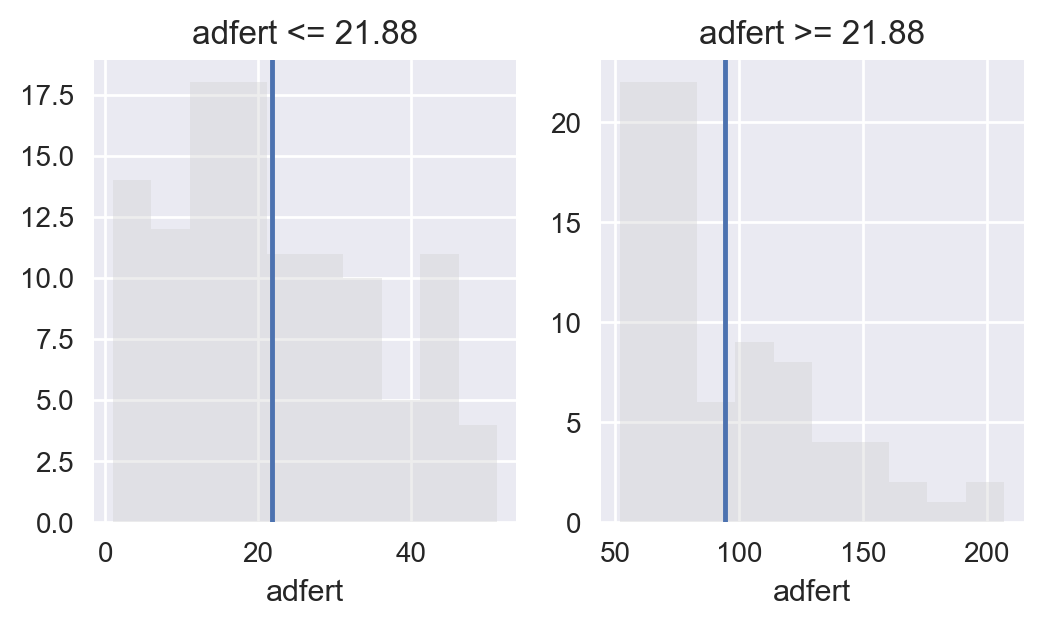

In [4]:
def binarize_histogram(dataframe, variable):
    plt.rcParams["figure.figsize"] = (6,3)
    dataframe['binarize'] = np.where(dataframe[variable] > np.mean(dataframe[variable]), 1, 0)
    
    hist1 = dataframe[dataframe['binarize'] == 1][variable].dropna()
    hist0 = dataframe[dataframe['binarize'] == 0][variable].dropna()
    
    plt.subplot(1,2,1)
    sns.distplot(hist0, bins=10,kde=False, color='lightgrey').set_title(f'{variable} <= {round(np.mean(hist0),3)}')
    plt.axvline(np.mean(hist0))
    plt.subplot(1,2,2)
    sns.distplot(hist1, bins=10, kde=False, color='lightgrey').set_title(f'{variable} >= {round(np.mean(hist0),3)}')
    plt.axvline(np.mean(hist1))
    
binarize_histogram(df,'adfert')

- Boxplots

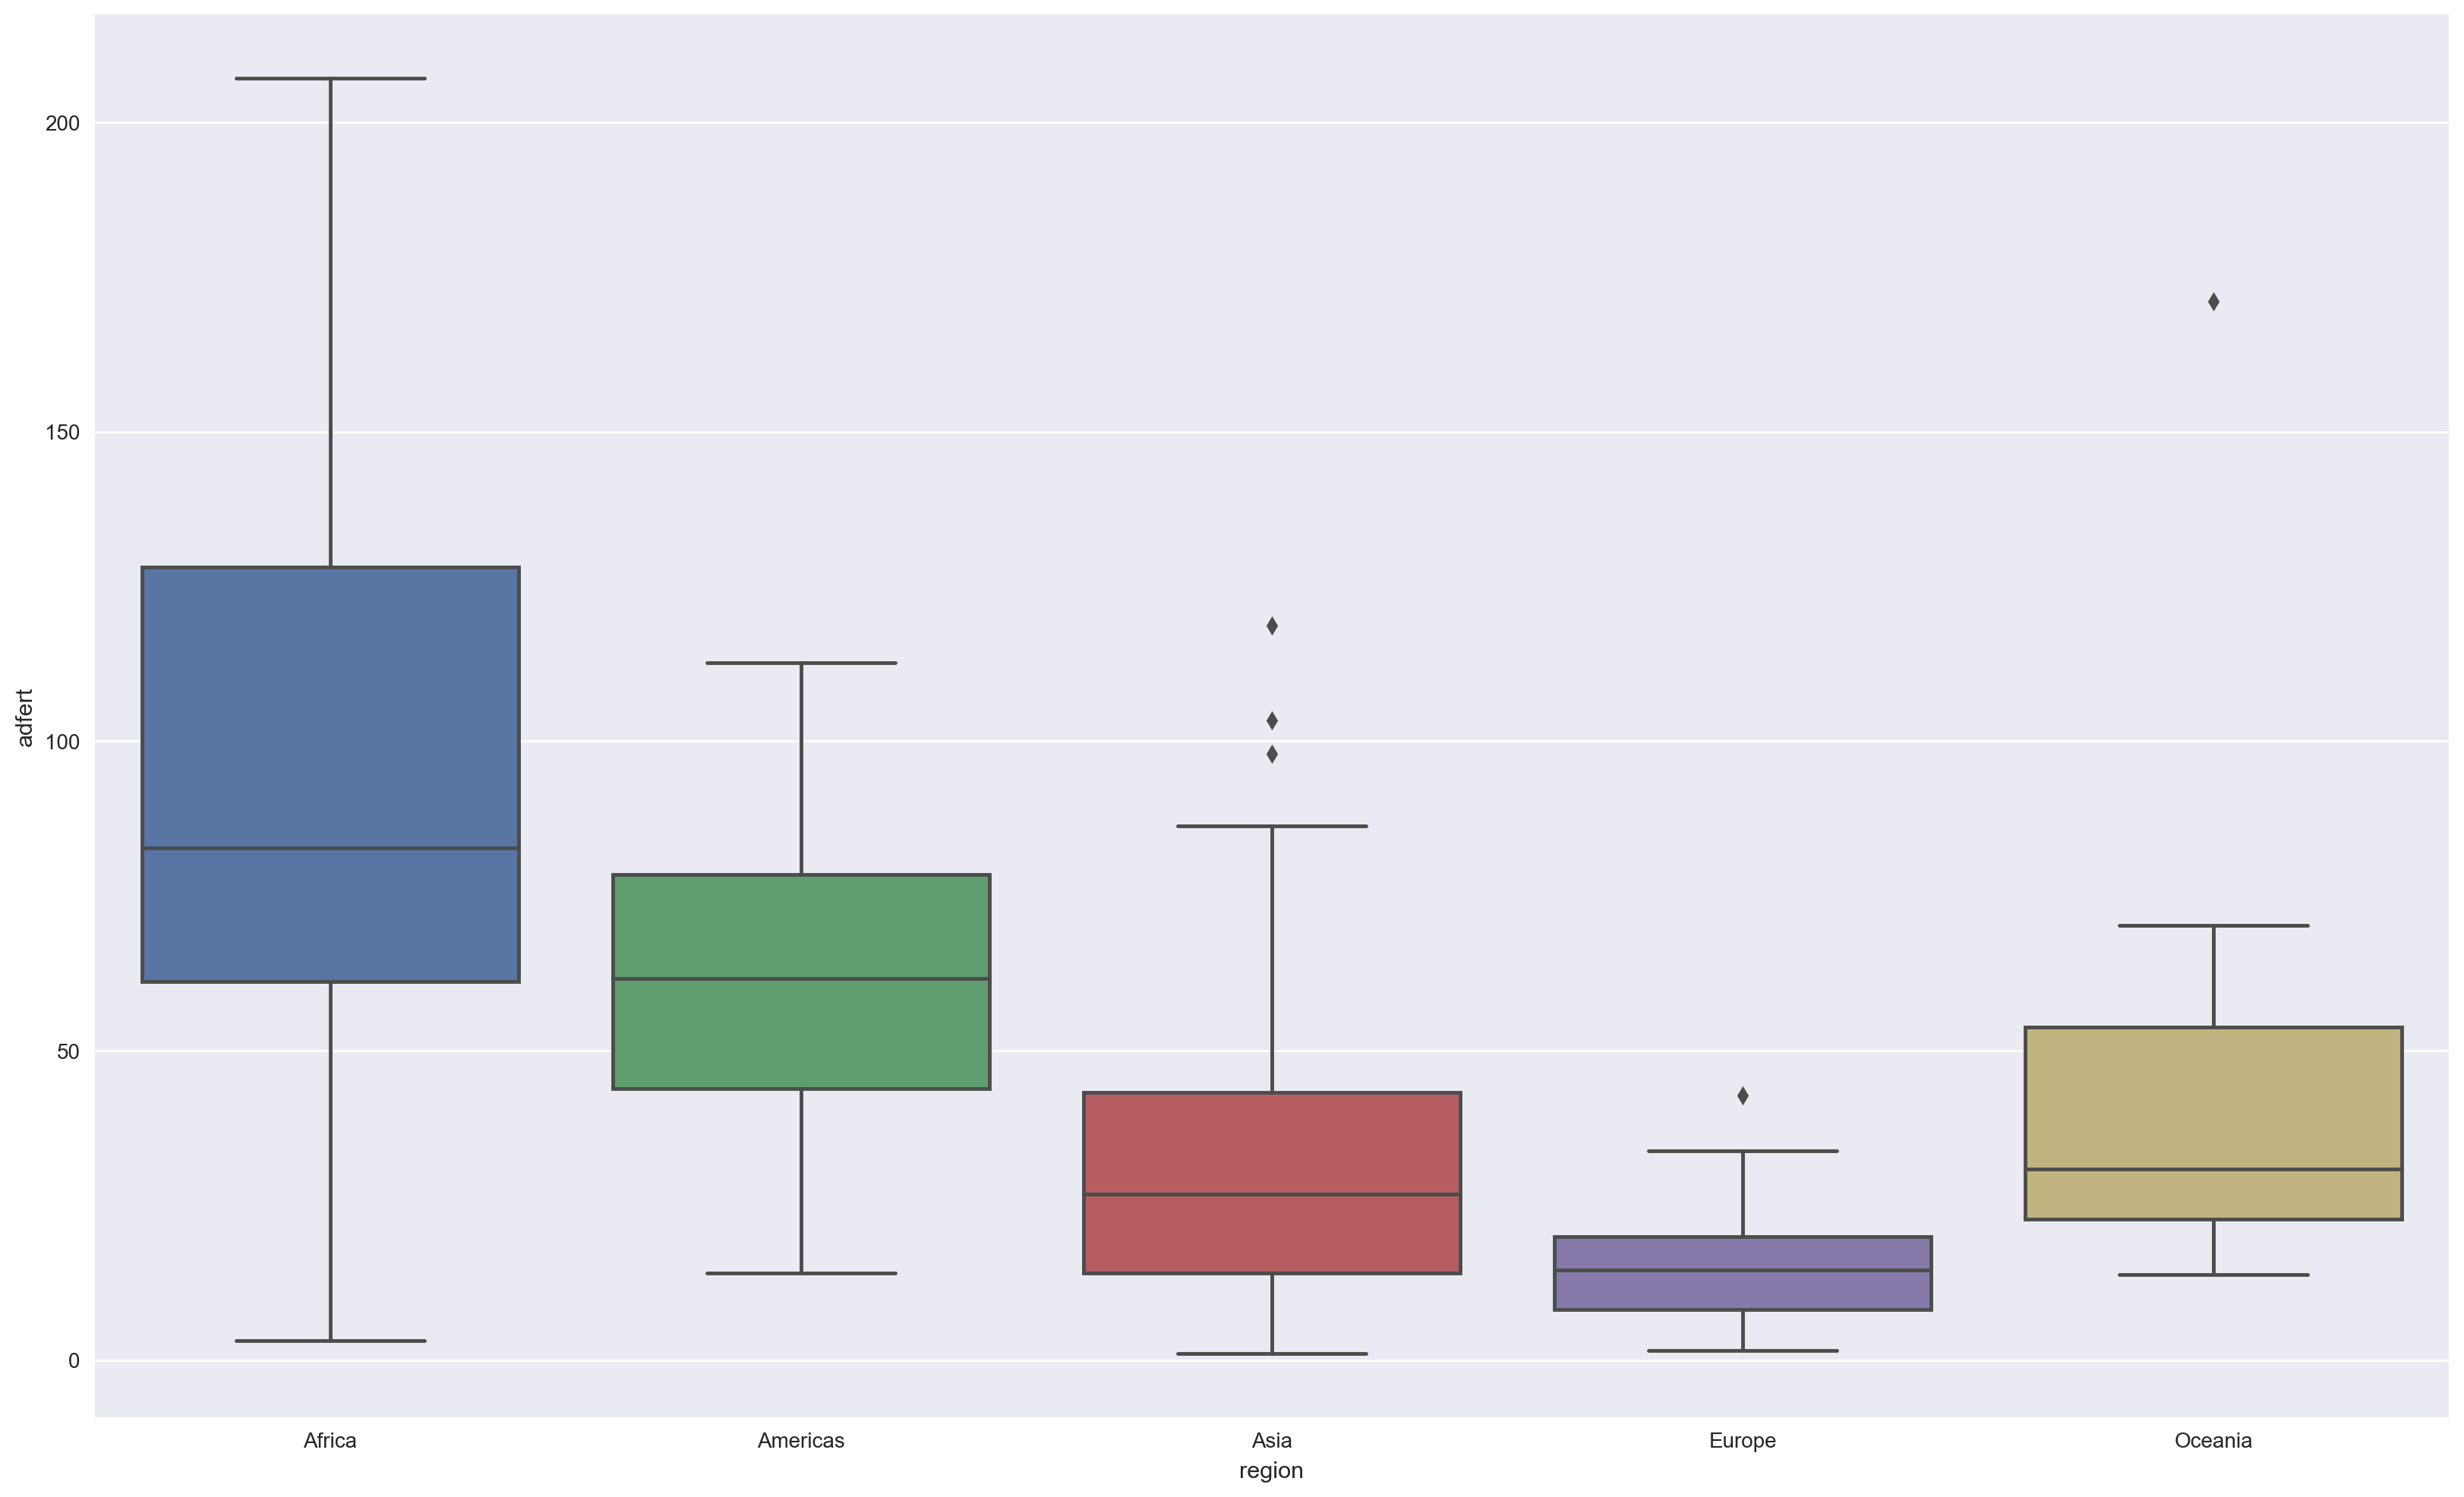

In [5]:
def grouped_boxplot(dataframe, variable, group_by):
    plt.rcParams['figure.figsize'] = (20,12)
    sns.boxplot(y=variable, x=group_by, data=dataframe)
    
grouped_boxplot(df,'adfert','region')

- Scatterplots

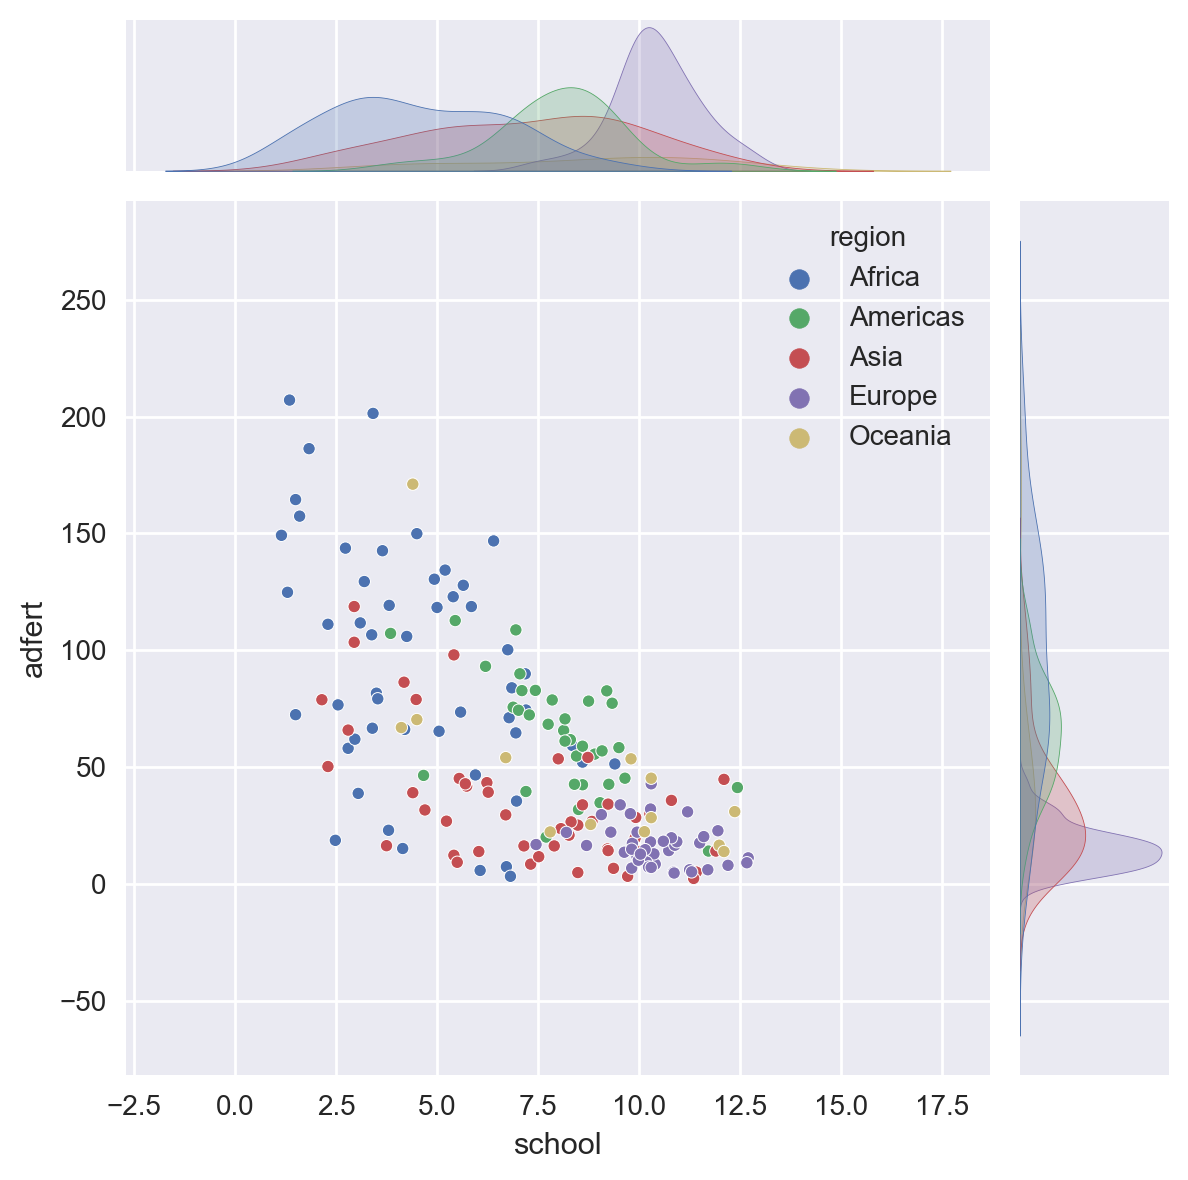

In [6]:
def grouped_scatterplot(dataframe, x, y, group_by):
    sns.jointplot(dataframe[x],df[y],data=dataframe,hue=group_by,s=20)
    
grouped_scatterplot(df,'school','adfert','region')

##### 3. Generar un heatmap entre todas las variables

<AxesSubplot:>

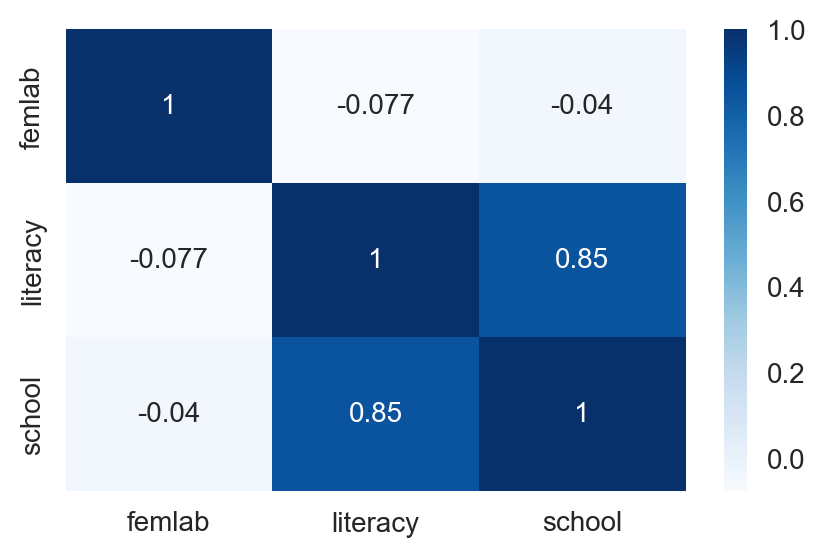

In [7]:
plt.rcParams['figure.figsize'] = (5,3)
sns.heatmap(df2.corr(),cmap='Blues',annot=True)

La correlación más relevante corresponde a la tasa de alfabetismo con el promedio de años de escolaridad con un valor de .85

##### 4. A partir de las principales correlaciones, separarlas en un nuevo objeto y calcular la matriz de correlaciones para todas las regiones

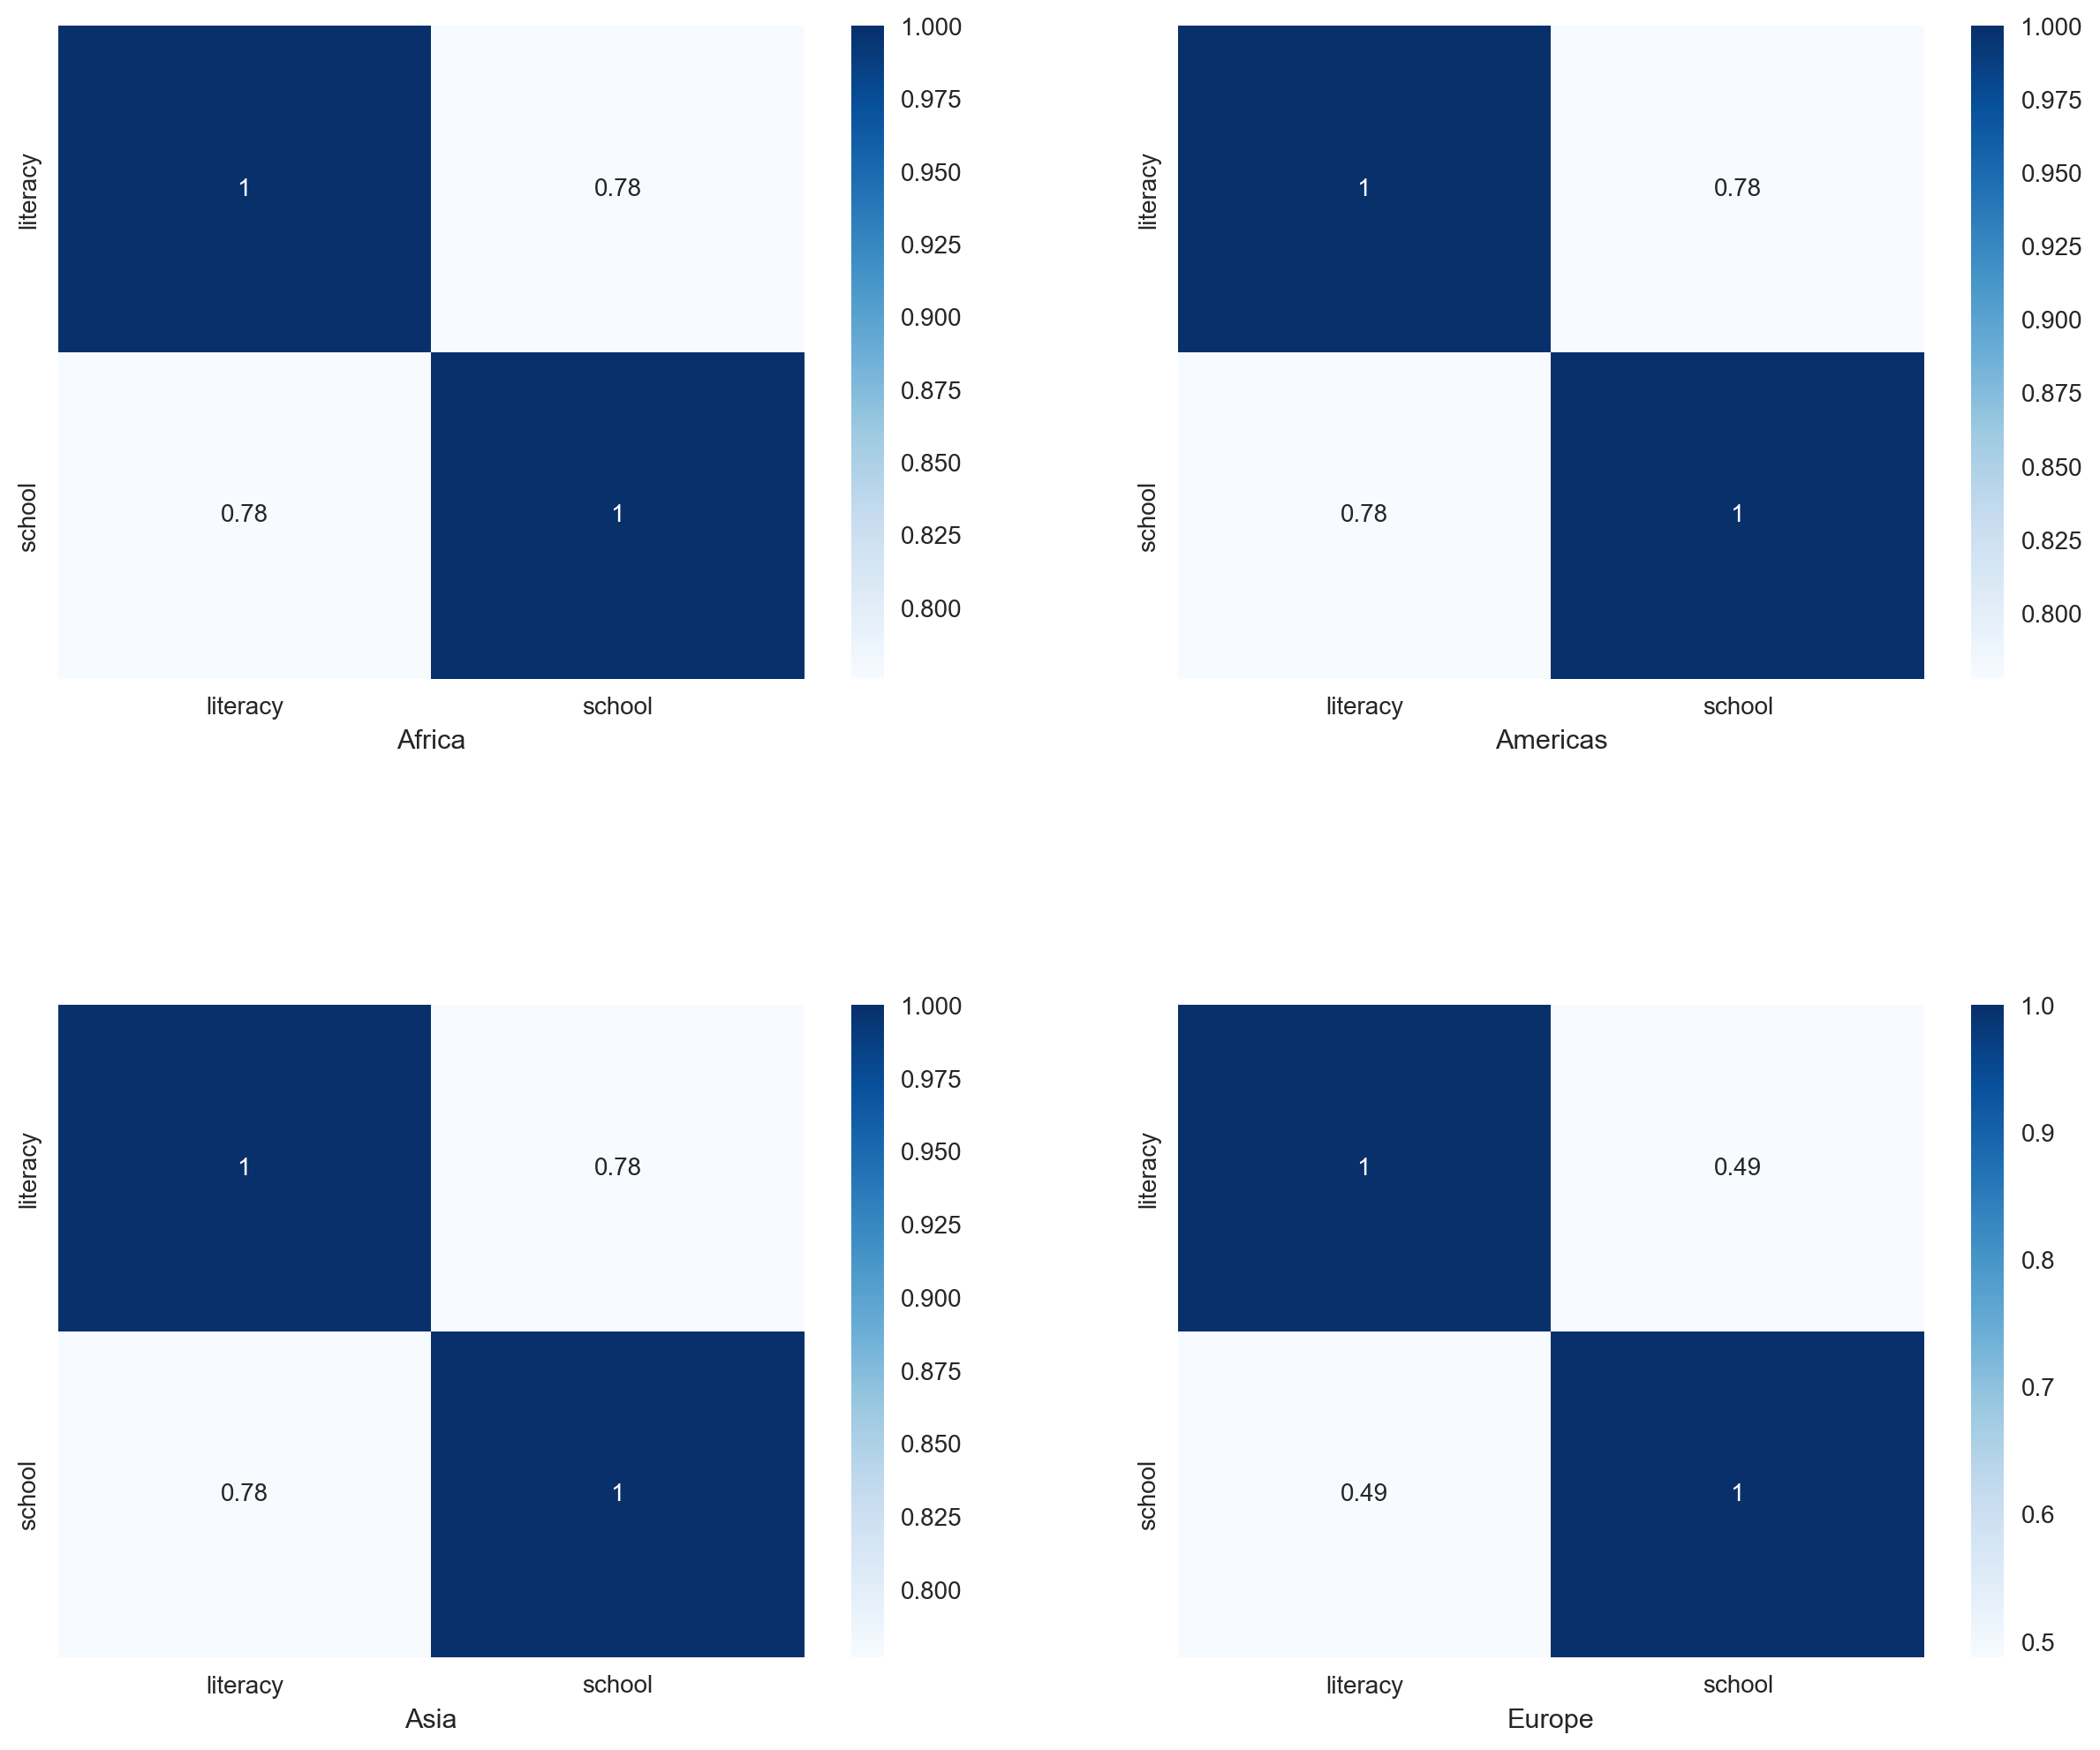

In [35]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(15,12))
plt.subplots_adjust(hspace=0.5)

subset = df2.loc[:,['region','literacy','school']]

for region,ax in zip(subset['region'].unique(), axs.ravel()):
    df_region = subset.loc[subset['region'] == region]
    sns.heatmap(df_region.corr(),cmap='Blues',ax=ax,annot=True)
    ax.set_xlabel(region)

- La correlación entre la tasa de alfabetismo con el promedio de años de escolaridad es similar en África, América y Asia. Mientras que, en Europa esta tiene una menor correlación con un valor de 0.49.